<a href="https://colab.research.google.com/github/Shital-P276/ADS-LAB/blob/main/lab/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

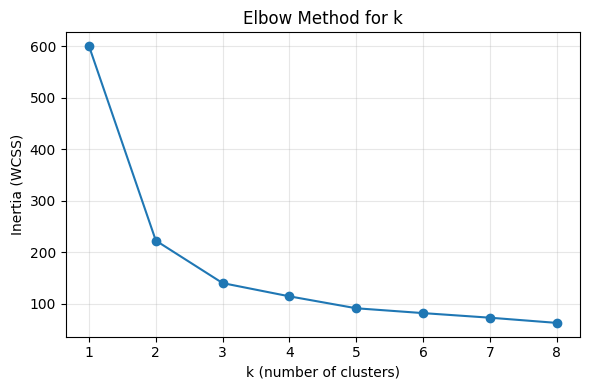

Silhouette score (k=3): 0.4599


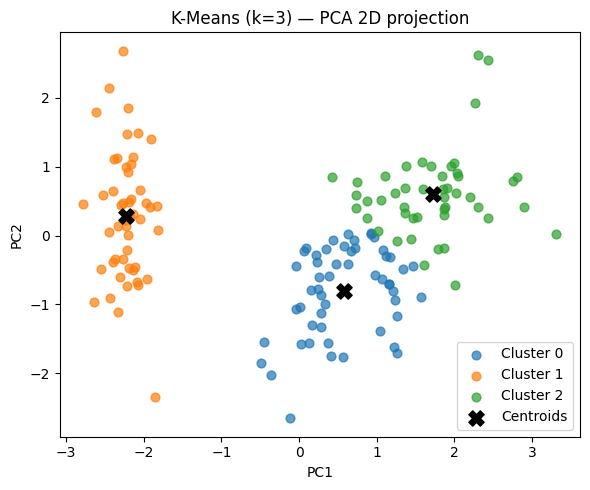

In [16]:
# exp_kmeans_minimal.py
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Load & scale data
data = load_iris(as_frame=True)
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Elbow method (inertia vs k) — try k from 1..8
inertias = []
K_range = range(1,9)
for k in K_range:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for k')
plt.xticks(K_range)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Choose k (example: k=3 for Iris) and fit
k = 3
km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
labels = km.fit_predict(X_scaled)

# 4. Silhouette score (optional metric)
sil_score = silhouette_score(X_scaled, labels)
print("Silhouette score (k={}): {:.4f}".format(k, sil_score))

# 5. 2D visualization using PCA
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for cluster in range(k):
    pts = X2[labels == cluster]
    plt.scatter(pts[:,0], pts[:,1], s=40, alpha=0.7, label=f"Cluster {cluster}")
# plot centroids in PCA space (transform centroids)
centroids = km.cluster_centers_
centroids_2 = pca.transform(centroids)
plt.scatter(centroids_2[:,0], centroids_2[:,1], marker='X', s=120, color='black', label='Centroids')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"K-Means (k={k}) — PCA 2D projection")
plt.legend(loc='best')
plt.tight_layout()
plt.show()
